In [1]:
!pip install kaggle

     |████████████████████████████████| 58 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 10.5 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=2a133e7b39cc2599a43e87561b3c210452bccf05740bad23fdce77a779618056
  Stored in directory: /opt/ml/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [4]:
!chmod 600 /opt/ml/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c bike-sharing-demand

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 52.7MB/s]


In [8]:
!kaggle competitions list

ref                                                         deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
mpetitions/contradictory-my-dear-watson                     2030-07-01 23:59:00  Getting Started     Prizes         41           False  
mpetitions/gan-getting-started                              2030-07-01 23:59:00  Getting Started     Prizes        108           False  
mpetitions/store-sales-time-series-forecasting              2030-06-30 23:59:00  Getting Started  Knowledge       1384           False  
mpetitions/tpu-getting-started                              2030-06-03 23:59:00  Getting Started  Knowledge        180           False  
mpetitions/digit-recognizer                                 2030-01-01 00:00:00  Getting Started  Knowledge       2113           False  
mpetitions/titanic                       

In [11]:
import zipfile

bike_zip = zipfile.ZipFile('/opt/ml/bike-sharing-demand.zip')
bike_zip.extractall('/opt/ml/bike_dataset')

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [185]:
train_df = pd.read_csv('/opt/ml/bike_dataset/train.csv')
test_df = pd.read_csv('/opt/ml/bike_dataset/test.csv')
submission_df = pd.read_csv('/opt/ml/bike_dataset/sampleSubmission.csv')

In [186]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [187]:
test_df.columns # 구해야 하는 것은 count로 casual + registered인 것을 알 수 있다. 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [188]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [189]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [190]:
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [191]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [192]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [193]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [194]:
# datetime을 날짜로 바꾸자
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [195]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [196]:
print(train_df.shape)
print(test_df.shape)

(10886, 12)
(6493, 9)


In [197]:
print(train_df['datetime'].dt.hour.unique())
print(train_df['datetime'].dt.minute.unique())
print(train_df['datetime'].dt.second.unique())
print(test_df['datetime'].dt.hour.unique())
print(test_df['datetime'].dt.minute.unique())
print(test_df['datetime'].dt.second.unique())
# 분, 초는 고려하지 않아도 된다. 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0]
[0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0]
[0]


# 년도, 월별, 날짜별, 시간대별 사용량 추이 확인

In [198]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

## 년도별

<AxesSubplot:xlabel='year', ylabel='count'>

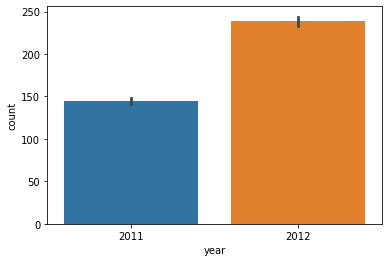

In [199]:
sns.barplot(data=train_df, x = 'year', y = 'count')
# 2012년이 2011년보다 더 사용량이 증가했다. 

In [200]:
test_df['year'].unique()
# test도 2011년, 2012년이 있음

array([2011, 2012])

## 월별 사용량 추이

<AxesSubplot:xlabel='month', ylabel='count'>

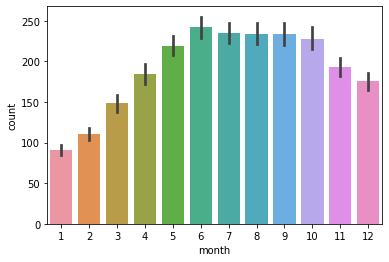

In [201]:
sns.barplot(data=train_df, x='month', y = 'count')
# 달은 6~10이 가장 많이 탐

## 날짜별 사용량 추이

<AxesSubplot:xlabel='day', ylabel='count'>

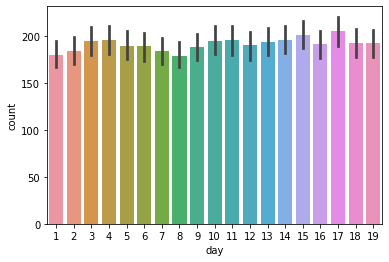

In [202]:
sns.barplot(data=train_df, x='day', y='count')

## 시간대별 사용량 추이

<AxesSubplot:xlabel='hour', ylabel='count'>

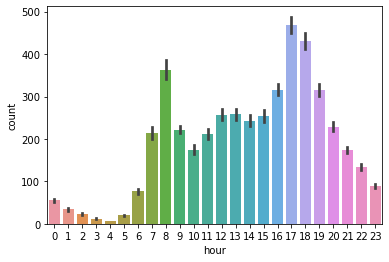

In [203]:
sns.barplot(data=train_df, x='hour', y='count')
# 아침 8시, 17시, 18시에 사용량이 많았다.

## 시간대별 workingday 여부에 따른 사용량 추이

<AxesSubplot:xlabel='hour', ylabel='count'>

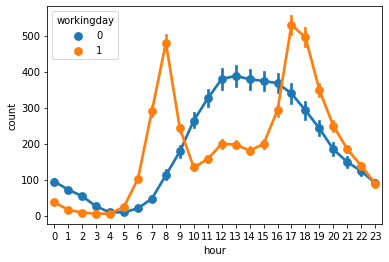

In [204]:
sns.pointplot(data=train_df, x='hour', y='count', hue='workingday')
# working day일 때의 분포가 위에서 시간대별 분포랑 비슷한 양상을 보이기 때문에 출퇴근 시간에 많이 이용하는 것이 맞다. 
# 나머지 시간대는 거의 working day가 아닐 때 이용한 것

## 시간대별 holiday 여부에 따른 사용량 추이

<AxesSubplot:xlabel='hour', ylabel='count'>

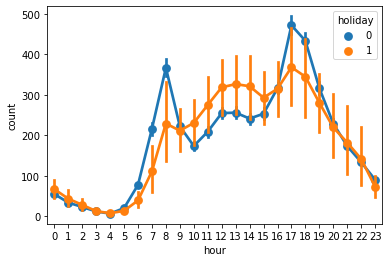

In [205]:
sns.pointplot(data=train_df, x='hour', y='count', hue='holiday')

## 계절별 사용량 추이

<AxesSubplot:xlabel='season', ylabel='count'>

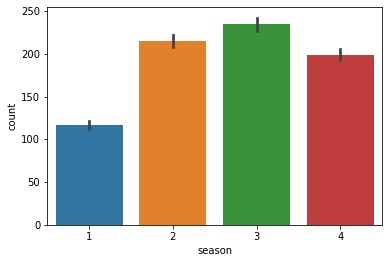

In [206]:
sns.barplot(data=train_df, x='season', y='count')

## 날씨별 / 시간대별 사용량 추이

<AxesSubplot:xlabel='hour', ylabel='count'>

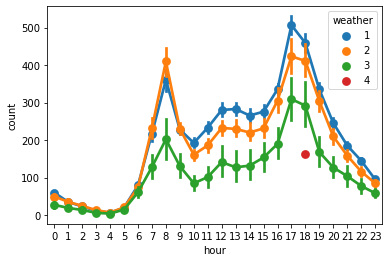

In [207]:
sns.pointplot(data=train_df, x='hour', y='count', hue='weather')
# 날씨가 안좋을 수록 많이 안 타지만, 가장 안 좋을 때도 18시에는 사용량이 꽤 높음
# workingday일 때는 날씨가 좋지 않아도 타는지 확인

<AxesSubplot:xlabel='workingday', ylabel='count'>

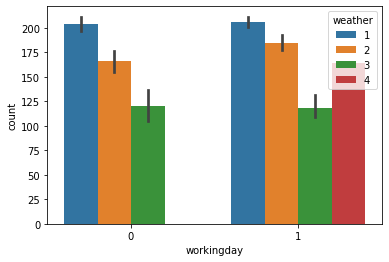

In [208]:
sns.barplot(data=train_df, x='workingday', y='count', hue='weather')
# workingday에는 퇴근 시간에 자전거를 타는 것을 알 수 있다. 

# feature간 상관관계 파악

<AxesSubplot:>

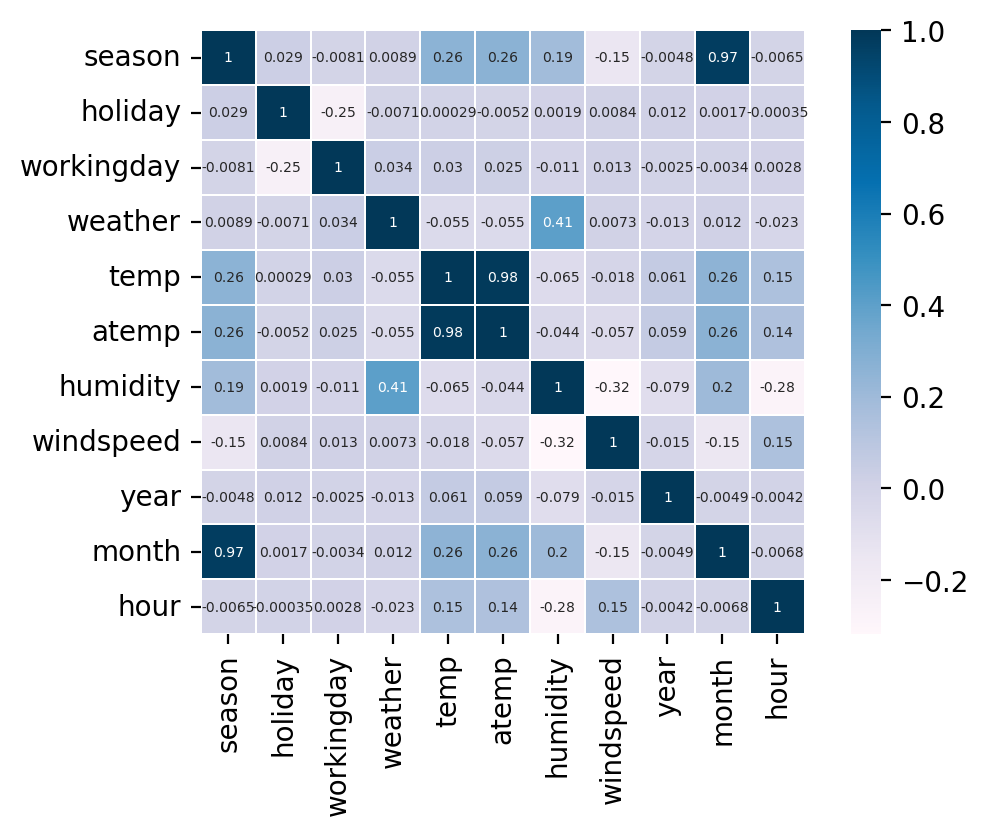

In [209]:
fig, ax = plt.subplots(1, 1, dpi = 200)
#train_df.drop('datetime', axis=1, inplace=True)
corr_data = train_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour']]
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(), linewidths=0.1, square=True, annot=True, annot_kws={'size': 5},cmap=colormap, axes=ax)

In [210]:
#train_df.drop(['temp', 'season'], axis=1, inplace=True)
# temp랑 atemp랑 상관계수가 높고, 
# month 랑 season이랑 상관계수가 높으니 삭제

# 연속형 변수 (온도, 습도, 바람세기)

<AxesSubplot:xlabel='humidity', ylabel='count'>

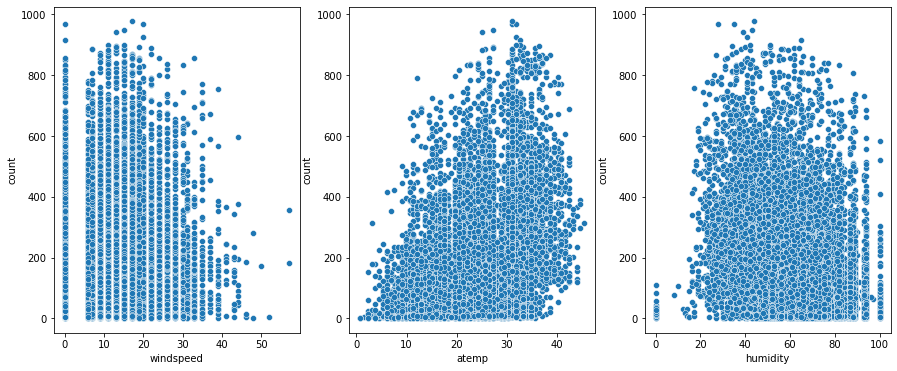

In [211]:
fia, ax = plt.subplots(1, 3, figsize=(15, 6))

sns.scatterplot(data=train_df, x='windspeed', y='count', ax=ax[0])
sns.scatterplot(data=train_df, x='atemp', y='count', ax=ax[1])
sns.scatterplot(data=train_df, x='humidity', y='count',ax=ax[2])
# windspeed가 0인 값이 있다.


# 이상치 제거

## 정규화

In [212]:
# from sklearn.preprocessing import StandardScaler
# transformer = StandardScaler()
# transformer.fit(train_df)
# train_regularize = transformer.transform(train_df)
# regularized_train_df = pd.DataFrame(train_regularize, columns=train_df.columns)
# regularized_train_df


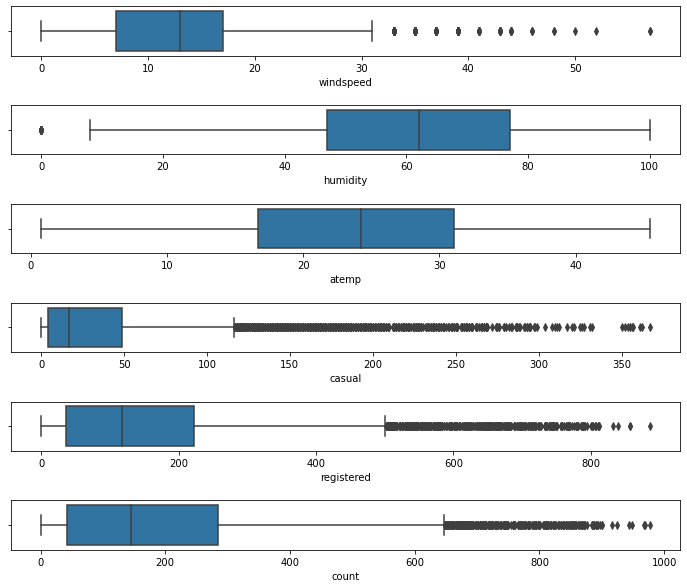

In [213]:
fig, axes = plt.subplots(6, 1, figsize = (12,10))
axes = axes.flatten()
plt.subplots_adjust(hspace=1)
x = ['windspeed', 'humidity', 'atemp', 'casual', 'registered', 'count']
for i in range(len(x)):
    sns.boxplot(data = train_df, x = x[i], ax = axes[i])


In [214]:
from collections import Counter

def detect_outliers(data, n, cols):
    outlier_indices = []

    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers
    
Outliers_to_drop = detect_outliers(train_df, 1, ["atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [215]:
train_df.shape

(10886, 16)

In [216]:
train_df = train_df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
train_df.shape

(10573, 16)

# Skewness, Kurtosis 확인하기

/opt/conda/envs/mmdet/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 0.917366
Kurtosis : 0.064385


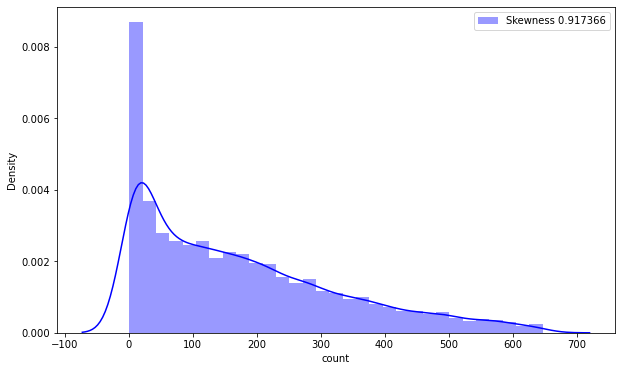

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(train_df['count'], color='b', label='Skewness {:2f}'.format(train_df['count'].skew()), ax=ax)
g = g.legend(loc='best')
print('Skewness : {:2f}'.format(train_df['count'].skew())) # 왜도는 0을 기준으로 판단
print('Kurtosis : {:2f}'.format(train_df['count'].kurt())) # 첨도는 3을 기준으로 판단

/opt/conda/envs/mmdet/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : -1.001072
Kurtosis : 0.249241


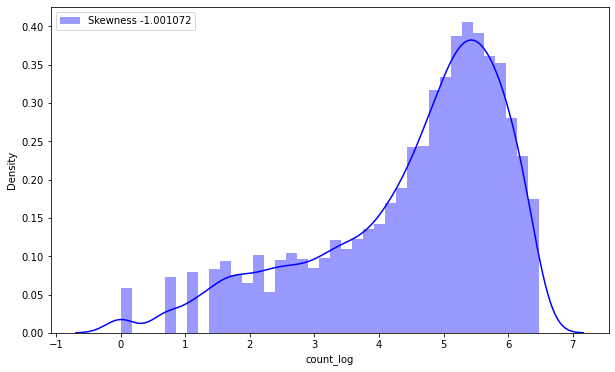

In [218]:
train_df['count_log'] = train_df['count'].apply(lambda x:np.log(x) if x>0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(train_df['count_log'], color='b', label='Skewness {:2f}'.format(train_df['count_log'].skew()), ax=ax)
g = g.legend(loc='best')
print('Skewness : {:2f}'.format(train_df['count_log'].skew())) # 왜도는 0을 기준으로 판단
print('Kurtosis : {:2f}'.format(train_df['count_log'].kurt())) # 첨도는 3을 기준으로 판단

# 풍속이 0 (NaN값으로 볼 수도 있다. 왜냐하면 NaN값에 보통 0을 집어넣기 때문, 풍속이 0인 경우는 거의 없다고 판단)

/opt/conda/envs/mmdet/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/mmdet/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/mmdet/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Text(0.5, 1.0, 'test_windspeed')

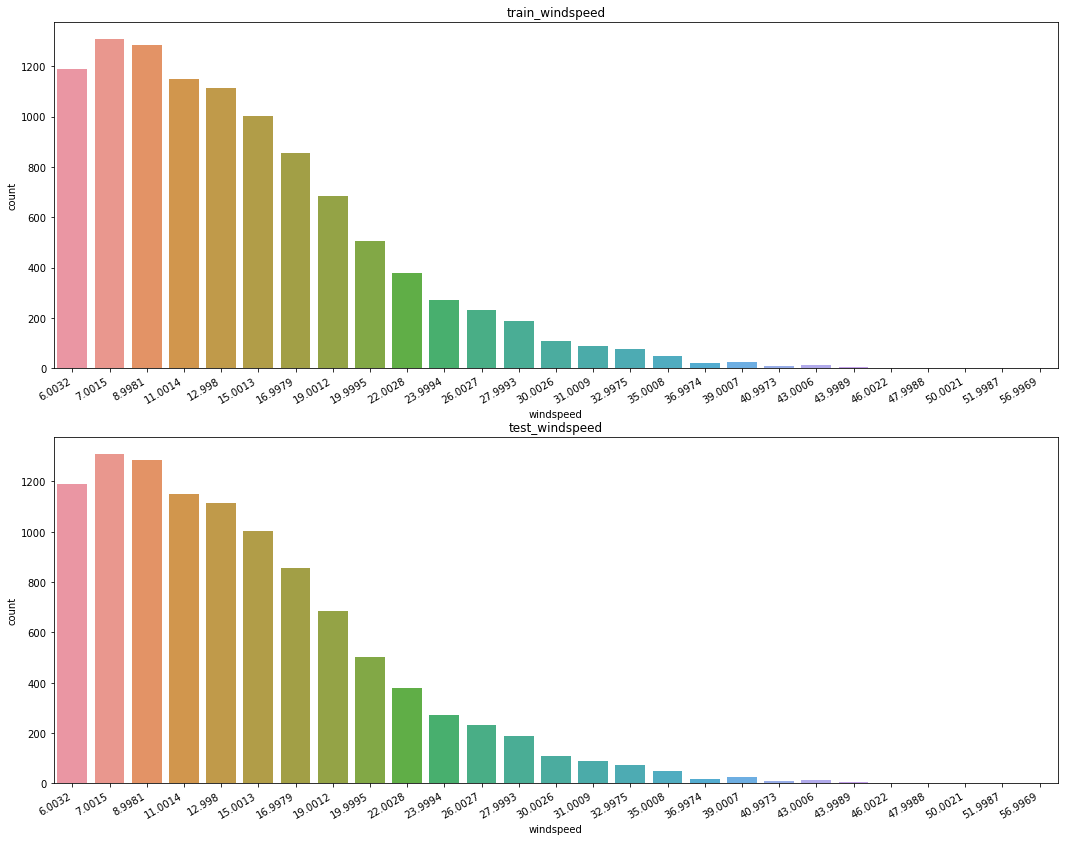

In [221]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]
    wcol = ['season', 'weather', 'humidity', 'day', 'temp', 'hour']

    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0['windspeed'])
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0

    data = predictWindNot0.append(predictWind0)

    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

    return data

new_train_df = predict_windspeed(train_df)
new_test_df = predict_windspeed(test_df)

fig, axes = plt.subplots(2, 1, figsize=(18, 14))

axes=axes.flatten()

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
sns.countplot(data=new_train_df, x='windspeed', ax=axes[0])
axes[0].set_title('train_windspeed')

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
sns.countplot(data=new_train_df, x='windspeed', ax=axes[1])
axes[1].set_title('test_windspeed')

### onehot encoding으로 변경

In [226]:
new_train_df = pd.get_dummies(new_train_df, columns=['weather'], prefix='weather')
new_test_df = pd.get_dummies(new_test_df, columns=['weather'], prefix='weather')

new_train_df = pd.get_dummies(new_train_df, columns=['season'], prefix='season')
new_test_df = pd.get_dummies(new_test_df, columns=['season'], prefix='season')

In [228]:
datetime_test = new_test_df['datetime'] 
print(new_train_df.columns)
print(new_test_df.columns)
train_df_result = new_train_df.drop(["count", "datetime", "registered","casual", "temp", "holiday", "month"], axis = 1) 
test_df_result = new_test_df.drop(["datetime","holiday", "temp", "month"], axis = 1)
print(train_df_result)
print(test_df_result)


Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day',
       'hour', 'count_log', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')
Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'day', 'hour', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')
       workingday   atemp  humidity  windspeed  year  day  hour  count_log  \
0               0  12.880        75     6.0032  2011    1     5   0.000000   
1               0  19.695        76    16.9979  2011    1    10   3.583519   
2               0  16.665        81    19.0012  2011    1    11   4.025352   
3               0  21.210        77    19.0012  2011    1    12   4.430817   
4               0  22.725        72    1

# 학습하기

In [231]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = train_df_result.drop("count_log", axis=1).values
target_label = train_df_result['count_log'].values
X_test = test_df_result.values
X_tra, X_val, y_tra, y_val = train_test_split(X_train, target_label, test_size=0.2, random_state=2000)

In [233]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                        max_depth = 4,
                                        min_samples_leaf=15,
                                        min_samples_split=10,
                                        random_state=42)
regressor.fit(X_tra, y_tra)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

[4.40671925 3.33220451 5.42934563 ... 3.21887582 1.94591015 6.13122649]


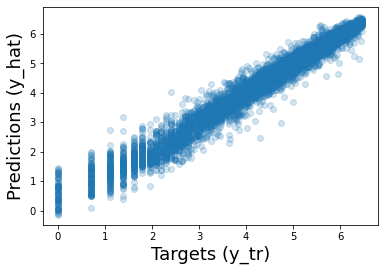

In [235]:
y_hat = regressor.predict(X_tra)
plt.scatter(y_tra, y_hat, alpha=0.2)
plt.xlabel('Targets (y_tr)',size=18) 
plt.ylabel('Predictions (y_hat)',size=18) 
plt.show()

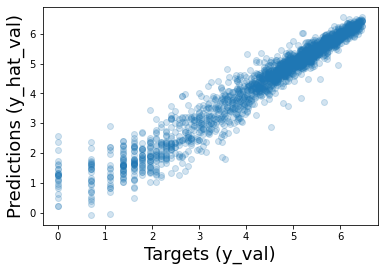

In [238]:
y_hat_val = regressor.predict(X_val) 
plt.scatter(y_val, y_hat_val, alpha=0.2) 
plt.xlabel('Targets (y_val)',size=18) 
plt.ylabel('Predictions (y_hat_val)',size=18) 
plt.show()

In [239]:
train_acc = regressor.score(X_tra, y_tra)
val_acc = regressor.score(X_val, y_val)
print(f'train accuracy : {train_acc}')
print(f'train accuracy : {val_acc}')

train accuracy : 0.9688988117405344
train accuracy : 0.9400206522952236


# 예측하기

In [241]:
pred = regressor.predict(X_test)

In [242]:
submission_df['datetime']=datetime_test
submission_df['count_log'] = pred
submission_df['count'] = submission_df['count_log'].apply(lambda x:np.exp(x))
submission_df.drop('count_log', axis=1, inplace=True)
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,8.562208
1,2011-01-20 03:00:00,1.665524
2,2011-01-20 04:00:00,1.616327
3,2011-01-20 05:00:00,5.635673
4,2011-01-20 06:00:00,28.003096


In [243]:
submission_df.to_csv('/opt/ml/bike_dataset/Bike.csv', index=False)